In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import FID_util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_diffusion_image/"

## Data Sets

In [2]:
CIFAR_train_loader = DataLoader(datasets.CIFAR10('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True)

CIFAR_train = FID_util.load_data_single(CIFAR_train_loader, 10000, (32, 32))
CIFAR_generated = FID_util.load_from_dir("./diffusion_images/cifar_generated/*.png")
print(f"Base FID CIFAR-10: {FID_util.compute_FID(CIFAR_train, CIFAR_generated).item()}")

Files already downloaded and verified
Base FID CIFAR-10: 17.56197166442871


In [3]:
CelebA_train = FID_util.load_from_dir("./data/celeba_hq_256/*.jpg", seed)
CelebA_generated = FID_util.load_from_dir("./diffusion_images/celebA_generated/*.png")
print(f"Base FID CelebA-HQ DDIM: {FID_util.compute_FID(CelebA_train, CelebA_generated, batch_num=125).item()}")
CelebA_ldm_generated = FID_util.load_from_dir("./diffusion_images/celebA_ldm_generated/*.png")
print(f"Base FID CelebA-HQ LDM: {FID_util.compute_FID(CelebA_train, CelebA_ldm_generated, batch_num=125).item()}")

Base FID CelebA-HQ DDIM: 21.09842300415039
Base FID CelebA-HQ LDM: 25.89986801147461


## Salt and Pepper Noise

/home/shaoqingf/FID_research/FID_util.py:108: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  noised_test = torch.tensor(random_noise(noised_test, mode="s&p", seed=seed, amount=amount))


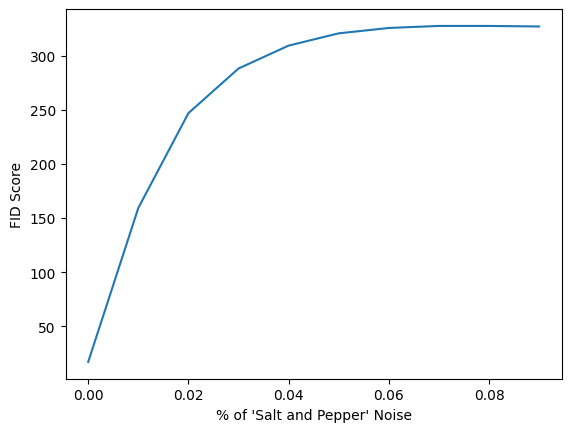

In [4]:
percentages = np.arange(0, 0.1, 0.01)
noise_FID_results = [FID_util.noisify_FID(p, CIFAR_train, CIFAR_generated, seed=seed) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "g_CIFAR_Noise_fid_scores")

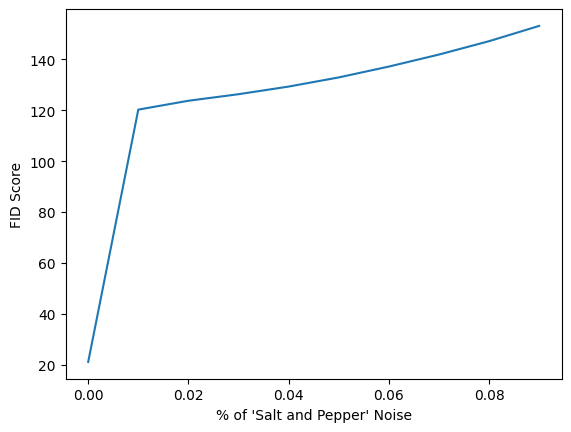

In [5]:
noise_FID_results = [FID_util.noisify_FID(p, CelebA_train, CelebA_generated, seed=seed, batch_num=125) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "g_CelebA_Noise_fid_scores")

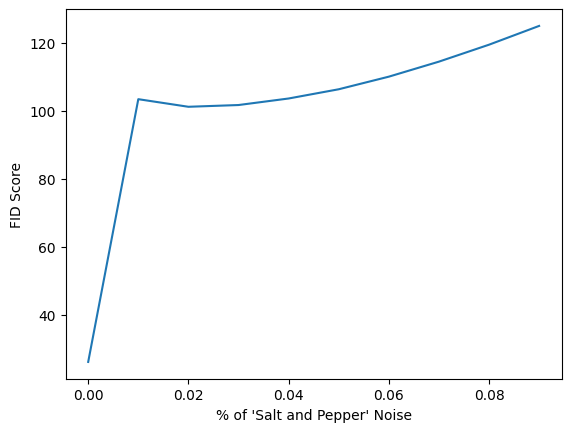

In [6]:
noise_FID_results = [FID_util.noisify_FID(p, CelebA_train, CelebA_ldm_generated, seed=seed, batch_num=125) for p in percentages]
plt.plot(percentages, noise_FID_results)
plt.xlabel("% of 'Salt and Pepper' Noise")
plt.ylabel("FID Score")
plt.savefig(plot_path + "g_CelebA_ldm_Noise_fid_scores")

## Switching Segments

32.37480163574219

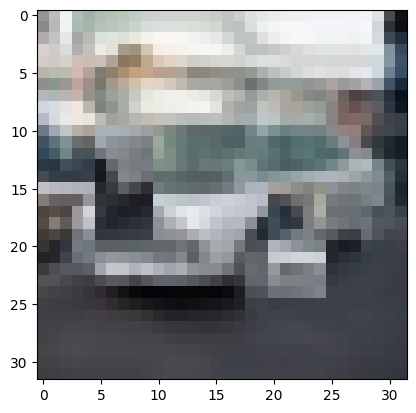

In [7]:
FID_util.swap_chunks((5, 10, 10, 20), (20, 15, 25, 25), CIFAR_train, CIFAR_generated)

81.681884765625

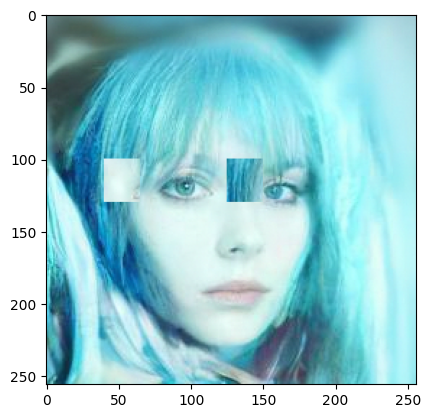

In [8]:
FID_util.swap_chunks((125, 100, 150, 130), (40, 100, 65, 130), CelebA_train, CelebA_generated, batch_num=125)

111.95000457763672

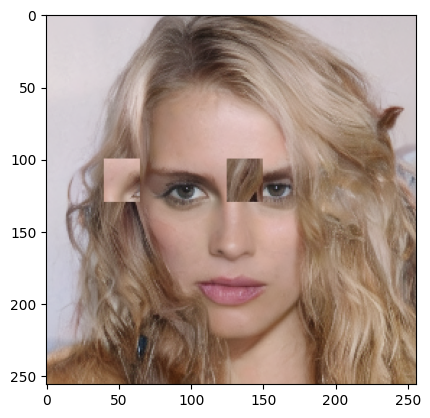

In [9]:
FID_util.swap_chunks((125, 100, 150, 130), (40, 100, 65, 130), CelebA_train, CelebA_ldm_generated, batch_num=125)